In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action="ignore")

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc("font", family=font_name)

import matplotlib as mpl
mpl.rcParams["axes.unicode_minus"] = False

# 서울시 구별 범죄 현황 분석

+ CCTV와 범죄, 검거율에 관계가 있는가?
+ 강남3구는 과연 범죄 발생율이 낮고 검거율이 높은가?

### (1) 데이터 준비

+ https://www.data.go.kr
+ 구글에서 "서울시 관서별 5대 범죄 발생 검거 현황" 검색

In [2]:
crime_anal_police = pd.read_csv("data/seoul/crime_in_seoul.csv", encoding="euc-kr", thousands=",") 
#,가 들어간것은 천자리-> 숫자로 인식해라
crime_anal_police.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
0,중부서,2,2,3,2,105,65,1395,477,1355,1170
1,종로서,3,3,6,5,115,98,1070,413,1278,1070
2,남대문서,1,0,6,4,65,46,1153,382,869,794
3,서대문서,2,2,5,4,154,124,1812,738,2056,1711
4,혜화서,3,2,5,4,96,63,1114,424,1015,861


In [3]:
crime_anal_police.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   관서명     31 non-null     object
 1   살인 발생   31 non-null     int64 
 2   살인 검거   31 non-null     int64 
 3   강도 발생   31 non-null     int64 
 4   강도 검거   31 non-null     int64 
 5   강간 발생   31 non-null     int64 
 6   강간 검거   31 non-null     int64 
 7   절도 발생   31 non-null     int64 
 8   절도 검거   31 non-null     int64 
 9   폭력 발생   31 non-null     int64 
 10  폭력 검거   31 non-null     int64 
dtypes: int64(10), object(1)
memory usage: 2.8+ KB


### 2. EDA & Preprocessing

#### 2-1. 관서명을 구 이름으로 변경

+ GoogleMap API를 이용하여 주소를 획득
    - https://cloud.google.com
    - pip install googlemaps
    
+ kakao API를 이용하여 주소 획득
    - https://developers.kakao.com
    - https://kauth.kakao.com/oauth/authorize?client_id=api키복사하기&redirect_uri=http://localhost:8888&response_type=code

In [4]:
##### Googla Map 이용
import googlemaps

gmaps_key = 
gmaps = googlemaps.Client(key=gmaps_key)
gmaps
gmaps.geocode("중부서",language="ko")

SyntaxError: invalid syntax (<ipython-input-4-5f5d2840114b>, line 4)

In [5]:
# 관서명을 서울 ***경찰서로 변경

station_name = []
for name in crime_anal_police["관서명"]:
    station_name.append("서울" + str(name[:-1]) + "경찰서")

station_name

['서울중부경찰서',
 '서울종로경찰서',
 '서울남대문경찰서',
 '서울서대문경찰서',
 '서울혜화경찰서',
 '서울용산경찰서',
 '서울성북경찰서',
 '서울동대문경찰서',
 '서울마포경찰서',
 '서울영등포경찰서',
 '서울성동경찰서',
 '서울동작경찰서',
 '서울광진경찰서',
 '서울서부경찰서',
 '서울강북경찰서',
 '서울금천경찰서',
 '서울중랑경찰서',
 '서울강남경찰서',
 '서울관악경찰서',
 '서울강서경찰서',
 '서울강동경찰서',
 '서울종암경찰서',
 '서울구로경찰서',
 '서울서초경찰서',
 '서울양천경찰서',
 '서울송파경찰서',
 '서울노원경찰서',
 '서울방배경찰서',
 '서울은평경찰서',
 '서울도봉경찰서',
 '서울수서경찰서']

In [6]:
station_address = []
station_lat = []
station_lng = []

for name in station_name:
    tmp = gmaps.geocode(name, language="ko")
    station_address.append(tmp[0].get("formatted_address"))
    
    tmp_loc = tmp[0].get("geometry")
    station_lat.append(tmp_loc["location"]["lat"])
    station_lng.append(tmp_loc["location"]["lng"])
    
    print(name + "--->" + tmp[0].get("formatted_address"))     

NameError: name 'gmaps' is not defined

In [7]:
##### 카카오 API를 이용하는 방법

import requests

header = {"Authorization" : "KakaoAK ac954f19cba068733317852b32bb6e06"}
url = 'https://dapi.kakao.com/v2/local/search/keyword.json?query={}'.format("서울중부경찰서")

requests.get(url, headers=header).json()
#requests.get(url, headers=header).json()["documents"][0]["address_name"]

{'documents': [{'address_name': '서울 중구 저동2가 62-1',
   'category_group_code': 'PO3',
   'category_group_name': '공공기관',
   'category_name': '사회,공공기관 > 행정기관 > 경찰서',
   'distance': '',
   'id': '11151738',
   'phone': '',
   'place_name': '서울중부경찰서',
   'place_url': 'http://place.map.kakao.com/11151738',
   'road_address_name': '서울 중구 수표로 27',
   'x': '126.98958691395208',
   'y': '37.56361812722828'},
  {'address_name': '서울 중구 저동2가 62-1',
   'category_group_code': '',
   'category_group_name': '',
   'category_name': '사회,공공기관 > 행정기관부속시설',
   'distance': '',
   'id': '10795753',
   'phone': '',
   'place_name': '중부경찰서 민원봉사실',
   'place_url': 'http://place.map.kakao.com/10795753',
   'road_address_name': '서울 중구 수표로 27',
   'x': '126.990026067084',
   'y': '37.5636740269204'},
  {'address_name': '서울 중구 저동2가 62-1',
   'category_group_code': 'CT1',
   'category_group_name': '문화시설',
   'category_name': '문화,예술 > 문화시설 > 박물관',
   'distance': '',
   'id': '27184424',
   'phone': '',
   'place_name':

In [8]:
# 관서명을 서울 ***경찰서로 변경

station_name = []
for name in crime_anal_police["관서명"]:
    station_name.append("서울" + str(name[:-1]) + "경찰서")

station_name

['서울중부경찰서',
 '서울종로경찰서',
 '서울남대문경찰서',
 '서울서대문경찰서',
 '서울혜화경찰서',
 '서울용산경찰서',
 '서울성북경찰서',
 '서울동대문경찰서',
 '서울마포경찰서',
 '서울영등포경찰서',
 '서울성동경찰서',
 '서울동작경찰서',
 '서울광진경찰서',
 '서울서부경찰서',
 '서울강북경찰서',
 '서울금천경찰서',
 '서울중랑경찰서',
 '서울강남경찰서',
 '서울관악경찰서',
 '서울강서경찰서',
 '서울강동경찰서',
 '서울종암경찰서',
 '서울구로경찰서',
 '서울서초경찰서',
 '서울양천경찰서',
 '서울송파경찰서',
 '서울노원경찰서',
 '서울방배경찰서',
 '서울은평경찰서',
 '서울도봉경찰서',
 '서울수서경찰서']

In [9]:
station_address = []
station_lat = []
station_lng = []

for name in station_name:
    url = 'https://dapi.kakao.com/v2/local/search/keyword.json?query={}'.format(name)
    place = requests.get(url, headers=header).json()["documents"]

    station_address.append(place[0].get("address_name"))
    station_lat.append(place[0].get("y"))
    station_lng.append(place[0].get("x"))
    
    print(name + "--->" + place[0].get("address_name"))     

서울중부경찰서--->서울 중구 저동2가 62-1
서울종로경찰서--->서울 종로구 경운동 90-18
서울남대문경찰서--->서울 중구 남대문로5가 567
서울서대문경찰서--->서울 서대문구 미근동 165
서울혜화경찰서--->서울 종로구 인의동 48-57
서울용산경찰서--->서울 용산구 원효로1가 12-12
서울성북경찰서--->서울 성북구 삼선동5가 301
서울동대문경찰서--->서울 동대문구 청량리동 229
서울마포경찰서--->서울 마포구 아현동 618-1
서울영등포경찰서--->서울 영등포구 당산동3가 2-11
서울성동경찰서--->서울 성동구 행당동 192-8
서울동작경찰서--->서울 동작구 노량진동 72-35
서울광진경찰서--->서울 광진구 구의동 254-32
서울서부경찰서--->서울 은평구 녹번동 177-15
서울강북경찰서--->서울 강북구 번동 415-15
서울금천경찰서--->서울 금천구 시흥동 1030
서울중랑경찰서--->서울 중랑구 신내동 810
서울강남경찰서--->서울 강남구 대치동 998
서울관악경찰서--->서울 관악구 봉천동 1695-5
서울강서경찰서--->서울 강서구 화곡동 980-27
서울강동경찰서--->서울 강동구 성내동 541-1
서울종암경찰서--->서울 성북구 종암동 3-1260
서울구로경찰서--->서울 구로구 구로동 436
서울서초경찰서--->서울 서초구 서초동 1726-1
서울양천경찰서--->서울 양천구 신정동 321
서울송파경찰서--->서울 송파구 가락동 9
서울노원경찰서--->서울 노원구 하계동 250
서울방배경찰서--->서울 서초구 방배동 455-10
서울은평경찰서--->서울 은평구 불광동 산 24
서울도봉경찰서--->서울 도봉구 창동 17
서울수서경찰서--->서울 강남구 개포동 14


In [10]:
##### 받은 주소에서 구 이름만 추출

df = pd.DataFrame([station_address, station_lat, station_lng]).T
df.columns = ["구별","위도","경도"]
#df["구별"] = df["구별"].str.split(" ").str[1]
df["구별"] = df["구별"].str.split(" ", expand=True)[1]
df

,구별,위도,경도
0,중구,37.56361812722828,126.98958691395208
1,종로구,37.57553779077874,126.98489861889408
2,중구,37.55478043476484,126.97349729923079
3,서대문구,37.5649023404956,126.966790740735
4,종로구,37.5718915247338,126.998935936567
5,용산구,37.54117933635974,126.96777437089538
6,성북구,37.58989767143614,127.01625465308534
7,동대문구,37.5850804205685,127.045762797538
8,마포구,37.5510118582052,126.95394117396
9,영등포구,37.52585220719,126.90094457988


In [11]:
##### "구별" 컬럼 추가 (파생변수)

crime_anal_police["구별"] = df["구별"]
crime_anal_police

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별
0,중부서,2,2,3,2,105,65,1395,477,1355,1170,중구
1,종로서,3,3,6,5,115,98,1070,413,1278,1070,종로구
2,남대문서,1,0,6,4,65,46,1153,382,869,794,중구
3,서대문서,2,2,5,4,154,124,1812,738,2056,1711,서대문구
4,혜화서,3,2,5,4,96,63,1114,424,1015,861,종로구
5,용산서,5,5,14,14,194,173,1557,587,2050,1704,용산구
6,성북서,2,2,2,1,86,71,953,409,1194,1015,성북구
7,동대문서,5,5,13,13,173,146,1981,814,2548,2227,동대문구
8,마포서,8,8,14,10,294,247,2555,813,2983,2519,마포구
9,영등포서,14,12,22,20,295,183,2964,978,3572,2961,영등포구


#### 2-2. Checkpoint

In [12]:
crime_anal_police.to_csv("data/seoul/crime_in_seoul_include_gu_name.csv",encoding="utf-8")

In [13]:
crime_anal_raw = pd.read_csv("data/seoul/crime_in_seoul_include_gu_name.csv",index_col=0)
crime_anal_raw

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별
0,중부서,2,2,3,2,105,65,1395,477,1355,1170,중구
1,종로서,3,3,6,5,115,98,1070,413,1278,1070,종로구
2,남대문서,1,0,6,4,65,46,1153,382,869,794,중구
3,서대문서,2,2,5,4,154,124,1812,738,2056,1711,서대문구
4,혜화서,3,2,5,4,96,63,1114,424,1015,861,종로구
5,용산서,5,5,14,14,194,173,1557,587,2050,1704,용산구
6,성북서,2,2,2,1,86,71,953,409,1194,1015,성북구
7,동대문서,5,5,13,13,173,146,1981,814,2548,2227,동대문구
8,마포서,8,8,14,10,294,247,2555,813,2983,2519,마포구
9,영등포서,14,12,22,20,295,183,2964,978,3572,2961,영등포구


#### 2-3. 관서명을 없애고 구별을 인덱스로 설정

In [14]:
#crime_anal_raw.drop(["관서명"],axis=1,inplace=True)
del crime_anal_raw["관서명"]
crime_anal = crime_anal_raw.set_index(["구별"])
crime_anal.head()

,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
구별,,,,,,,,,,
중구,2,2,3,2,105,65,1395,477,1355,1170
종로구,3,3,6,5,115,98,1070,413,1278,1070
중구,1,0,6,4,65,46,1153,382,869,794
서대문구,2,2,5,4,154,124,1812,738,2056,1711
종로구,3,2,5,4,96,63,1114,424,1015,861


#### 2-4. 각 범죄별 검거율을 계산하여 파생변수로 추가하고, 각 검거 컬럼은 삭제

In [15]:
crime_anal["살인검거율"] = crime_anal["살인 검거"] / crime_anal["살인 발생"] * 100
crime_anal["강도검거율"] = crime_anal["강도 검거"] / crime_anal["강도 발생"] * 100
crime_anal["강간검거율"] = crime_anal["강간 검거"] / crime_anal["강간 발생"] * 100
crime_anal["절도검거율"] = crime_anal["절도 검거"] / crime_anal["절도 발생"] * 100
crime_anal["폭력검거율"] = crime_anal["폭력 검거"] / crime_anal["폭력 발생"] * 100

del crime_anal["살인 검거"]
del crime_anal["강도 검거"]
del crime_anal["강간 검거"]
del crime_anal["절도 검거"]
del crime_anal["폭력 검거"]

In [16]:
crime_anal.head()

,살인 발생,강도 발생,강간 발생,절도 발생,폭력 발생,살인검거율,강도검거율,강간검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
중구,2,3,105,1395,1355,100.000000,66.666667,61.904762,34.193548,86.346863
종로구,3,6,115,1070,1278,100.000000,83.333333,85.217391,38.598131,83.724570
중구,1,6,65,1153,869,0.000000,66.666667,70.769231,33.130963,91.369390
서대문구,2,5,154,1812,2056,100.000000,80.000000,80.519481,40.728477,83.219844
종로구,3,5,96,1114,1015,66.666667,80.000000,65.625000,38.061041,84.827586


In [17]:
##### "발생"이라는 단어는 삭제(컬럼 변경)

crime_anal.rename(columns={"살인 발생":"살인", "강도 발생":"강도","강간 발생":"강간", "절도 발생":"절도","폭력 발생":"폭력"},inplace=True)
crime_anal.head()

,살인,강도,강간,절도,폭력,살인검거율,강도검거율,강간검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
중구,2,3,105,1395,1355,100.000000,66.666667,61.904762,34.193548,86.346863
종로구,3,6,115,1070,1278,100.000000,83.333333,85.217391,38.598131,83.724570
중구,1,6,65,1153,869,0.000000,66.666667,70.769231,33.130963,91.369390
서대문구,2,5,154,1812,2056,100.000000,80.000000,80.519481,40.728477,83.219844
종로구,3,5,96,1114,1015,66.666667,80.000000,65.625000,38.061041,84.827586


In [18]:
###### 검거율에서 100이 넘는 값들은 모두 100으로 맞춰준다.

for col in ["살인검거율","강도검거율","강간검거율","절도검거율","폭력검거율"]:
    crime_anal.loc[crime_anal[col] > 100, col] = 100

crime_anal.head()

,살인,강도,강간,절도,폭력,살인검거율,강도검거율,강간검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
중구,2,3,105,1395,1355,100.000000,66.666667,61.904762,34.193548,86.346863
종로구,3,6,115,1070,1278,100.000000,83.333333,85.217391,38.598131,83.724570
중구,1,6,65,1153,869,0.000000,66.666667,70.769231,33.130963,91.369390
서대문구,2,5,154,1812,2056,100.000000,80.000000,80.519481,40.728477,83.219844
종로구,3,5,96,1114,1015,66.666667,80.000000,65.625000,38.061041,84.827586


#### 2-5. 정규화 / 표준화 : 수치 데이터에 대한 scaling

+ 정규화(Normalization) 
    - 데이터의 상대적인 크기에 대해 영향을 줄이기 위해 데이터 범위를 0 ~ 1로 변환
    - (측정값 - 최소값) / (최대값 - 최소값)

+ 표준화(Standardization)
    - 데이터가 평균으로부터 얼마나 떨어져있는지 나타내는 값으로, 특정범위를 벗어난 데이터는 이상치로 간주
    - (측정값-평균)/표준편차


In [19]:
##### Normalization

from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()

cols = ["살인", "강도", "강간", "절도", "폭력"]
x = crime_anal[cols].values
x

x_scaled = min_max_scaler.fit_transform(x)
x_scaled

crime_anal_norm = pd.DataFrame(x_scaled, columns=cols, index=crime_anal.index)
crime_anal_norm

cols2 = ["살인검거율","강도검거율","강간검거율","절도검거율","폭력검거율"]

crime_anal_norm[cols2] = crime_anal[cols2]
crime_anal_norm

,살인,강도,강간,절도,폭력,살인검거율,강도검거율,강간검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
중구,0.076923,0.095238,0.167273,0.286930,0.267107,100.000000,66.666667,61.904762,34.193548,86.346863
종로구,0.153846,0.238095,0.203636,0.161253,0.241653,100.000000,83.333333,85.217391,38.598131,83.724570
중구,0.000000,0.238095,0.021818,0.193349,0.106446,0.000000,66.666667,70.769231,33.130963,91.369390
서대문구,0.076923,0.190476,0.345455,0.448183,0.498843,100.000000,80.000000,80.519481,40.728477,83.219844
종로구,0.153846,0.190476,0.134545,0.178268,0.154711,66.666667,80.000000,65.625000,38.061041,84.827586
용산구,0.307692,0.619048,0.490909,0.349575,0.496860,100.000000,100.000000,89.175258,37.700706,83.121951
성북구,0.076923,0.047619,0.098182,0.116009,0.213884,100.000000,50.000000,82.558140,42.917104,85.008375
동대문구,0.307692,0.571429,0.414545,0.513534,0.661488,100.000000,100.000000,84.393064,41.090358,87.401884
마포구,0.538462,0.619048,0.854545,0.735499,0.805289,100.000000,71.428571,84.013605,31.819961,84.445189


In [79]:
##### checkpoint

crime_anal_norm.to_csv("data/seoul/crime_anal_norm.csv", encoding="utf-8")

In [20]:
crime_anal_norm = pd.read_csv("data/seoul/crime_anal_norm.csv", index_col=0)
crime_anal_norm

,살인,강도,강간,절도,폭력,살인검거율,강도검거율,강간검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
중구,0.076923,0.095238,0.167273,0.286930,0.267107,100.000000,66.666667,61.904762,34.193548,86.346863
종로구,0.153846,0.238095,0.203636,0.161253,0.241653,100.000000,83.333333,85.217391,38.598131,83.724570
중구,0.000000,0.238095,0.021818,0.193349,0.106446,0.000000,66.666667,70.769231,33.130963,91.369390
서대문구,0.076923,0.190476,0.345455,0.448183,0.498843,100.000000,80.000000,80.519481,40.728477,83.219844
종로구,0.153846,0.190476,0.134545,0.178268,0.154711,66.666667,80.000000,65.625000,38.061041,84.827586
용산구,0.307692,0.619048,0.490909,0.349575,0.496860,100.000000,100.000000,89.175258,37.700706,83.121951
성북구,0.076923,0.047619,0.098182,0.116009,0.213884,100.000000,50.000000,82.558140,42.917104,85.008375
동대문구,0.307692,0.571429,0.414545,0.513534,0.661488,100.000000,100.000000,84.393064,41.090358,87.401884
마포구,0.538462,0.619048,0.854545,0.735499,0.805289,100.000000,71.428571,84.013605,31.819961,84.445189


#### 2-6. 인구수 데이터와 CCTV 데이터 추가
    
  - cctv_result.csv

In [21]:
cctv_result = pd.read_csv("data/seoul/cctv_result.csv", index_col="구별")
cctv_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,3238,150.619195,557865,552976,4889,65859,0.876377,11.805544,0.580427,1553.296412
양천구,2482,34.671731,473087,469221,3866,56070,0.817186,11.851943,0.524639,890.918761
강서구,911,134.793814,608361,601696,6665,77381,1.095567,12.719586,0.149747,829.467513
용산구,2096,53.216374,245411,229909,15502,37238,6.316750,15.173729,0.854077,756.346747
서초구,2297,63.371266,445164,440954,4210,54055,0.945719,12.142716,0.515990,736.754790


In [22]:
crime_anal_norm[["인구수", "CCTV"]] = cctv_result[["인구수", "소계"]]
crime_anal_norm.head()

,살인,강도,강간,절도,폭력,살인검거율,강도검거율,강간검거율,절도검거율,폭력검거율,인구수,CCTV
구별,,,,,,,,,,,,
중구,0.076923,0.095238,0.167273,0.286930,0.267107,100.000000,66.666667,61.904762,34.193548,86.346863,135139,1023
종로구,0.153846,0.238095,0.203636,0.161253,0.241653,100.000000,83.333333,85.217391,38.598131,83.724570,164348,1619
중구,0.000000,0.238095,0.021818,0.193349,0.106446,0.000000,66.666667,70.769231,33.130963,91.369390,135139,1023
서대문구,0.076923,0.190476,0.345455,0.448183,0.498843,100.000000,80.000000,80.519481,40.728477,83.219844,324871,1254
종로구,0.153846,0.190476,0.134545,0.178268,0.154711,66.666667,80.000000,65.625000,38.061041,84.827586,164348,1619


#### 2-7. 범죄 발생 건수와 검거율을 각각 범죄와 검거라는 컬럼으로 통합

In [23]:
cols = ["강간","강도","살인","절도","폭력"]
crime_anal_norm["범죄"] = np.sum(crime_anal_norm[cols], axis=1)
crime_anal_norm.head()

,살인,강도,강간,절도,폭력,살인검거율,강도검거율,강간검거율,절도검거율,폭력검거율,인구수,CCTV,범죄
구별,,,,,,,,,,,,,
중구,0.076923,0.095238,0.167273,0.286930,0.267107,100.000000,66.666667,61.904762,34.193548,86.346863,135139,1023,0.893471
종로구,0.153846,0.238095,0.203636,0.161253,0.241653,100.000000,83.333333,85.217391,38.598131,83.724570,164348,1619,0.998484
중구,0.000000,0.238095,0.021818,0.193349,0.106446,0.000000,66.666667,70.769231,33.130963,91.369390,135139,1023,0.559709
서대문구,0.076923,0.190476,0.345455,0.448183,0.498843,100.000000,80.000000,80.519481,40.728477,83.219844,324871,1254,1.559879
종로구,0.153846,0.190476,0.134545,0.178268,0.154711,66.666667,80.000000,65.625000,38.061041,84.827586,164348,1619,0.811846


In [24]:
cols = ["강간검거율","강도검거율","살인검거율","절도검거율","폭력검거율"]
crime_anal_norm["검거"] = np.sum(crime_anal_norm[cols], axis=1)
crime_anal_norm.head()

,살인,강도,강간,절도,폭력,살인검거율,강도검거율,강간검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
중구,0.076923,0.095238,0.167273,0.286930,0.267107,100.000000,66.666667,61.904762,34.193548,86.346863,135139,1023,0.893471,349.111840
종로구,0.153846,0.238095,0.203636,0.161253,0.241653,100.000000,83.333333,85.217391,38.598131,83.724570,164348,1619,0.998484,390.873425
중구,0.000000,0.238095,0.021818,0.193349,0.106446,0.000000,66.666667,70.769231,33.130963,91.369390,135139,1023,0.559709,261.936250
서대문구,0.076923,0.190476,0.345455,0.448183,0.498843,100.000000,80.000000,80.519481,40.728477,83.219844,324871,1254,1.559879,384.467802
종로구,0.153846,0.190476,0.134545,0.178268,0.154711,66.666667,80.000000,65.625000,38.061041,84.827586,164348,1619,0.811846,335.180294


### 3. Visualization

#### 3-1. 강도, 살인, 폭력 간의 상관관계

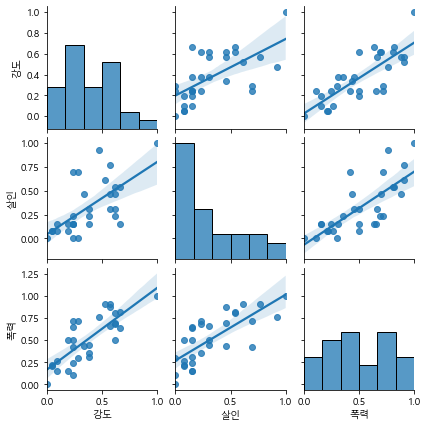

In [25]:
sns.pairplot(crime_anal_norm, vars=["강도","살인","폭력"], size=2, kind="reg")

#### 3-2. 인구수와 CCTV 갯수, 강도, 살인에 대한 상관관계

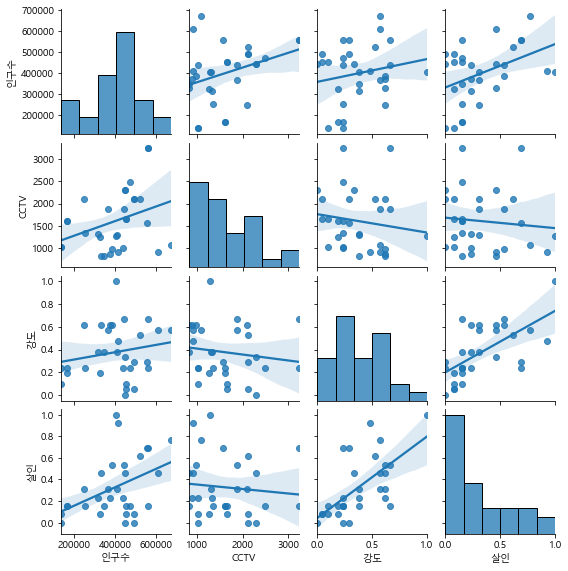

In [26]:
sns.pairplot(crime_anal_norm, vars=["인구수", "CCTV", "강도", "살인"], size=2, kind="reg")

#### 3-3. 살인 및 폭력 검거율과 인구수 및 CCTV의 상관 관계

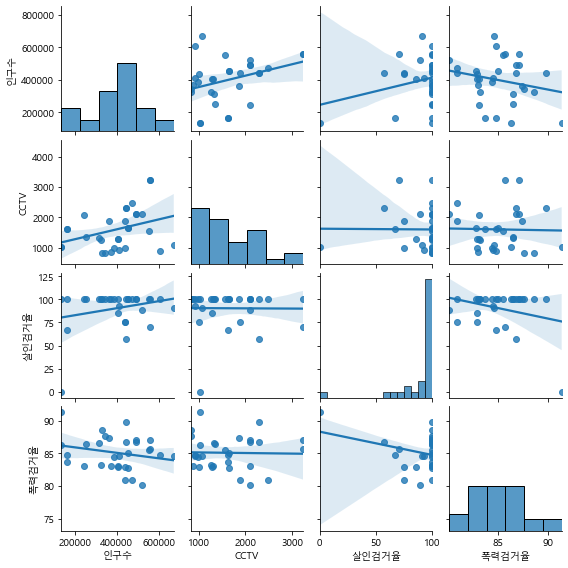

In [27]:
sns.pairplot(crime_anal_norm, vars=["인구수", "CCTV", "살인검거율", "폭력검거율"], size=2, kind="reg")

#### 3-4. 절도 및 강도 검거율과 인구수 및 CCTV의 상관 관계

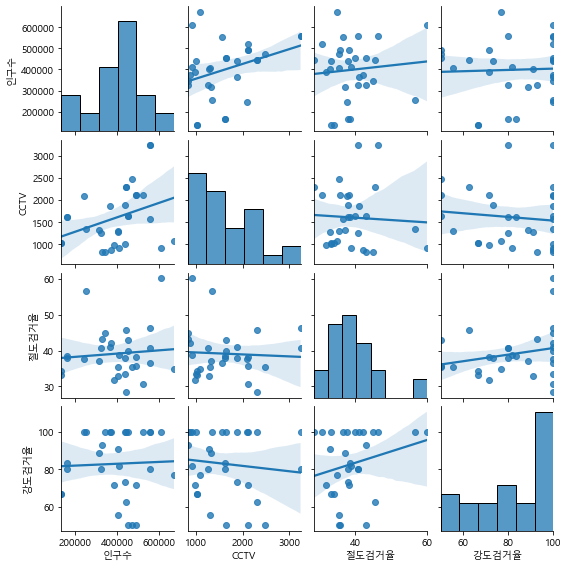

In [28]:
sns.pairplot(crime_anal_norm, vars=["인구수", "CCTV", "절도검거율", "강도검거율"], size=2, kind="reg")

#### 3-5. 지역별 검거율

In [29]:
##### 정규화

c_max = crime_anal_norm["검거"].max()
crime_anal_norm["검거"] = crime_anal_norm["검거"] / c_max * 100

crime_anal_norm_sort = crime_anal_norm.sort_values(by="검거", ascending=False)
crime_anal_norm_sort

,살인,강도,강간,절도,폭력,살인검거율,강도검거율,강간검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
도봉구,0.153846,0.380952,0.156364,0.158546,0.310744,100.000000,100.000000,100.000000,44.967074,87.626093,345041,825,1.160452,100.000000
금천구,0.153846,0.238095,0.334545,0.353442,0.498182,100.000000,100.000000,80.794702,56.668794,86.465433,253344,1348,1.578110,97.997139
강서구,0.461538,0.571429,0.738182,0.558005,0.879339,100.000000,100.000000,72.900763,60.114504,84.752105,608361,911,3.208492,96.572809
광진구,0.230769,0.619048,0.658182,0.917633,0.686942,100.000000,100.000000,91.666667,42.200925,83.047619,371671,878,3.112574,96.375820
서초구,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,100.000000,94.915254,28.483920,89.762340,445164,2297,0.000000,95.508100
동대문구,0.307692,0.571429,0.414545,0.513534,0.661488,100.000000,100.000000,84.393064,41.090358,87.401884,364962,1870,2.468688,95.444250
용산구,0.307692,0.619048,0.490909,0.349575,0.496860,100.000000,100.000000,89.175258,37.700706,83.121951,245411,2096,2.264083,94.776790
성동구,0.230769,0.380952,0.243636,0.368910,0.352066,100.000000,88.888889,94.444444,37.149969,86.538462,314551,1327,1.576334,94.088810
강북구,0.461538,0.619048,0.341818,0.302011,0.694876,100.000000,92.857143,82.352941,43.096234,88.637222,327511,831,2.419291,94.070728


Text(0.5, 1.0, '범죄 검거 비율(정규화된 검거의 합으로 정렬)')

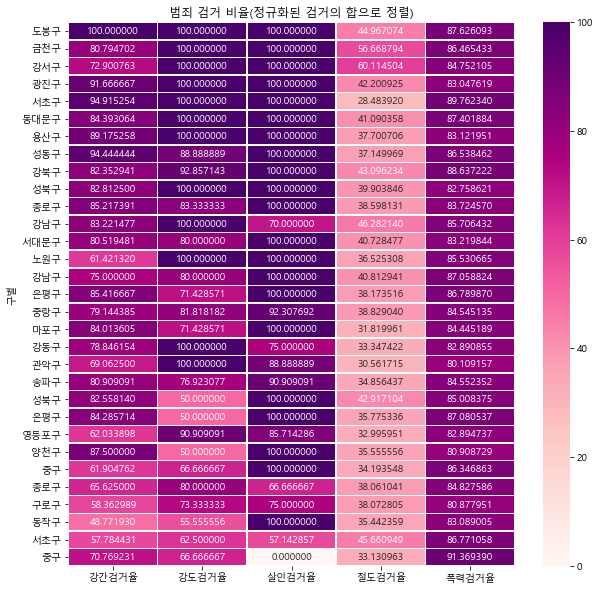

In [30]:
##### 히트맵 : 정렬된 결과를 한번에 쉽게 확인할 수 있게 해주는 그래프

plt.figure(figsize=(10, 10))
# cmap="RdPu": 색상(레드~보라),annot=True : 각 셀에 숫자를 입력, fmt="f": 실수형태로 숫자 입력,
sns.heatmap(crime_anal_norm_sort[["강간검거율", "강도검거율", "살인검거율", "절도검거율",
                                 "폭력검거율"]], cmap="RdPu", annot=True, fmt="f", linewidths=.5)
plt.title("범죄 검거 비율(정규화된 검거의 합으로 정렬)")

#### 3-6. 지역별 발생 건수

In [31]:
cols = ["강간", "강도", "살인", "절도", "폭력"]
crime_anal_norm["범죄"] = crime_anal_norm["범죄"]/5
crime_anal_norm_sort = crime_anal_norm.sort_values(by="범죄", ascending=False)
crime_anal_norm_sort

,살인,강도,강간,절도,폭력,살인검거율,강도검거율,강간검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
영등포구,1.000000,1.000000,0.858182,0.893658,1.000000,85.714286,90.909091,62.033898,32.995951,82.894737,403988,1277,0.950368,81.958753
송파구,0.769231,0.571429,0.585455,1.000000,0.908430,90.909091,76.923077,80.909091,34.856437,84.552352,671994,1081,0.766909,85.103066
관악구,0.615385,0.523810,0.949091,0.793890,0.909421,88.888889,100.000000,69.062500,30.561715,80.109157,522292,2109,0.758319,85.212224
마포구,0.538462,0.619048,0.854545,0.735499,0.805289,100.000000,71.428571,84.013605,31.819961,84.445189,385624,980,0.710569,85.925381
구로구,0.538462,0.666667,0.807273,0.650425,0.813223,75.000000,73.333333,58.362989,38.072805,80.877951,440396,1884,0.695210,75.277906
강서구,0.461538,0.571429,0.738182,0.558005,0.879339,100.000000,100.000000,72.900763,60.114504,84.752105,608361,911,0.641698,96.572809
중랑구,0.923077,0.476190,0.465455,0.573086,0.760331,92.307692,81.818182,79.144385,38.829040,84.545135,411552,916,0.639628,87.066663
광진구,0.230769,0.619048,0.658182,0.917633,0.686942,100.000000,100.000000,91.666667,42.200925,83.047619,371671,878,0.622515,96.375820
강남구,0.153846,0.666667,0.876364,0.679814,0.634050,100.000000,80.000000,75.000000,40.812941,87.058824,557865,3238,0.602148,88.506198


Text(0.5, 1.0, '범죄발생비율(정규화된 발생 건수의 합으로 정렬)')

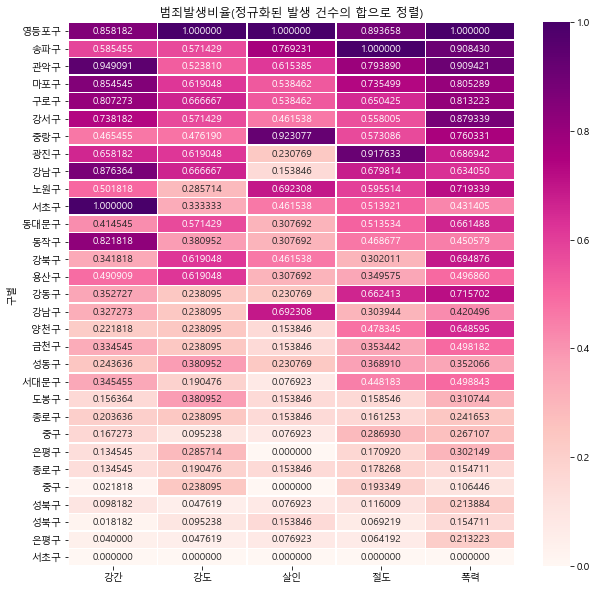

In [32]:
plt.figure(figsize=(10,10))
sns.heatmap(crime_anal_norm_sort[cols], cmap="RdPu", annot=True, fmt="f", linewidth=.5)
plt.title("범죄발생비율(정규화된 발생 건수의 합으로 정렬)")

### 4. 지도시각화

+ https://github.com/southkorea/southkorea-maps

In [34]:
import folium
import json

In [38]:
geo_path = "data/seoul/skorea_municipalities_geo_simple_seoul.json"

map = folium.Map(location=[37.497963, 127.027518], zoom_start=10)
map

geo_str = json.load(open(geo_path, encoding="utf-8"))
map.choropleth(geo_data=geo_str, data=crime_anal_norm["살인"],
              columns=[crime_anal_norm.index, crime_anal_norm["살인"]],
              key_on="feature.id", fill_color="PuRd")
map

In [41]:
map = folium.Map(location=[37.497963, 127.027518], zoom_start=10)
map

geo_str = json.load(open(geo_path, encoding="utf-8"))
map.choropleth(geo_data=geo_str,  data=crime_anal_norm["범죄"],
              columns=[crime_anal_norm.index, crime_anal_norm["범죄"]],
              key_on="feature.id", fill_color="PuRd")
map

#### 4-1. 인구 대비 범죄 발생 비율

In [42]:
murder_criminal = crime_anal_norm["살인"] / crime_anal_norm["인구수"] * 100000
murder_criminal

구별
중구      0.056921
종로구     0.093610
중구      0.000000
서대문구    0.023678
종로구     0.093610
용산구     0.125378
성북구     0.016947
동대문구    0.084308
마포구     0.139634
영등포구    0.247532
성동구     0.073365
동작구     0.075653
광진구     0.062090
은평구     0.015690
강북구     0.140923
금천구     0.060726
중랑구     0.224292
강남구     0.027578
관악구     0.117824
강서구     0.075866
강동구     0.052660
성북구     0.033894
구로구     0.122268
서초구     0.103678
양천구     0.032520
송파구     0.114470
노원구     0.124560
서초구     0.000000
은평구     0.000000
도봉구     0.044588
강남구     0.124100
dtype: float64

In [43]:
map = folium.Map(location=[37.497963, 127.027518], zoom_start=10)
map

geo_str = json.load(open(geo_path, encoding="utf-8"))
map.choropleth(geo_data=geo_str,  data=murder_criminal,
              columns=[crime_anal_norm.index, murder_criminal],
              key_on="feature.id", fill_color="PuRd")
map

#### 4-2. 경찰서별 검거율과 구별 범죄 발생율을 동시에 시각화

In [44]:
crime_anal_police = pd.read_csv("data/seoul/crime_in_seoul_include_gu_name.csv",index_col=0)
crime_anal_police.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별
0,중부서,2,2,3,2,105,65,1395,477,1355,1170,중구
1,종로서,3,3,6,5,115,98,1070,413,1278,1070,종로구
2,남대문서,1,0,6,4,65,46,1153,382,869,794,중구
3,서대문서,2,2,5,4,154,124,1812,738,2056,1711,서대문구
4,혜화서,3,2,5,4,96,63,1114,424,1015,861,종로구


In [45]:
crime_anal_police["lat"] = station_lat
crime_anal_police["lng"] = station_lng
crime_anal_police.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별,lat,lng
0,중부서,2,2,3,2,105,65,1395,477,1355,1170,중구,37.56361812722828,126.98958691395208
1,종로서,3,3,6,5,115,98,1070,413,1278,1070,종로구,37.57553779077874,126.98489861889408
2,남대문서,1,0,6,4,65,46,1153,382,869,794,중구,37.55478043476484,126.97349729923079
3,서대문서,2,2,5,4,154,124,1812,738,2056,1711,서대문구,37.5649023404956,126.966790740735
4,혜화서,3,2,5,4,96,63,1114,424,1015,861,종로구,37.5718915247338,126.998935936567


In [49]:
##### 경찰서 위치를 지도에 마킹하기

map = folium.Map(location=[37.497963, 127.027518], zoom_start=10)

# popup : 마커 클릭시 생성될 문구
for n in crime_anal_police.index:
    marker = folium.Marker(location=[crime_anal_police["lat"][n],
                                    crime_anal_police["lng"][n]],
                          icon = folium.Icon(color="red",icon="star"),
                          popup = crime_anal_police["관서명"][n])
    marker.add_to(map)

map

In [50]:
##### 검거율 정규화

cols = ["살인 검거","강도 검거","강간 검거","절도 검거","폭력 검거"]
temp = crime_anal_police[cols] / crime_anal_police.max()

crime_anal_police["검거"] = np.sum(temp, axis=1)
crime_anal_police.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별,lat,lng,검거
0,중부서,2,2,3,2,105,65,1395,477,1355,1170,중구,37.56361812722828,126.98958691395208,1.275416
1,종로서,3,3,6,5,115,98,1070,413,1278,1070,종로구,37.57553779077874,126.98489861889408,1.523847
2,남대문서,1,0,6,4,65,46,1153,382,869,794,중구,37.55478043476484,126.97349729923079,0.907372
3,서대문서,2,2,5,4,154,124,1812,738,2056,1711,서대문구,37.5649023404956,126.966790740735,1.978299
4,혜화서,3,2,5,4,96,63,1114,424,1015,861,종로구,37.5718915247338,126.998935936567,1.198382


In [53]:
map = folium.Map(location=[37.497963, 127.027518], zoom_start=11)

map.choropleth(geo_data=geo_str, data=murder_criminal, columns=[crime_anal_norm.index, murder_criminal],
              key_on="feature.id",fill_color="PuRd")

for n in crime_anal_police.index:
    folium.CircleMarker(location=[crime_anal_police["lat"][n],
                                  crime_anal_police["lng"][n]],
                       popup=crime_anal_police["관서명"][n],
                       radius=crime_anal_police["검거"][n] * 10,
                       color="#3186cc", fill_color="#3186cc").add_to(map)

map